In [44]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
import matplotlib.pyplot as plt
import seaborn as sns # for statistical data visualization
from pathlib import Path
import re

In [45]:
columns_names = [
    'Number of times pregnant',
    'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
    'Diastolic blood pressure (mm Hg)',
    'Triceps skin fold thickness (mm)',
    '2-Hour serum insulin (mu U/ml)',
    'Body mass index (weight in kg/(height in m)^2)',
    'Diabetes pedigree function',
    'Age (years)]',
]

In [46]:
DIR_NAME = Path('.').absolute()



In [47]:
data = pd.read_csv('./data/tieu-duong.csv')
print(data.head(15))

np_data = data.to_numpy()
np_data.shape

     6  148  72  35    0  33.6  0.627  50  1
0    1   85  66  29    0  26.6  0.351  31  0
1    8  183  64   0    0  23.3  0.672  32  1
2    1   89  66  23   94  28.1  0.167  21  0
3    0  137  40  35  168  43.1  2.288  33  1
4    5  116  74   0    0  25.6  0.201  30  0
5    3   78  50  32   88  31.0  0.248  26  1
6   10  115   0   0    0  35.3  0.134  29  0
7    2  197  70  45  543  30.5  0.158  53  1
8    8  125  96   0    0   0.0  0.232  54  1
9    4  110  92   0    0  37.6  0.191  30  0
10  10  168  74   0    0  38.0  0.537  34  1
11  10  139  80   0    0  27.1  1.441  57  0
12   1  189  60  23  846  30.1  0.398  59  1
13   5  166  72  19  175  25.8  0.587  51  1
14   7  100   0   0    0  30.0  0.484  32  1


(767, 9)

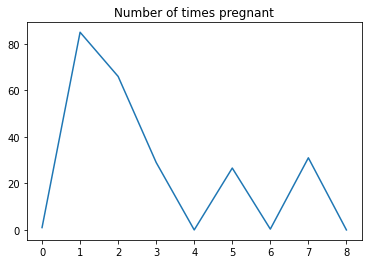

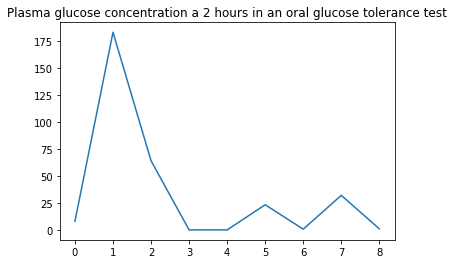

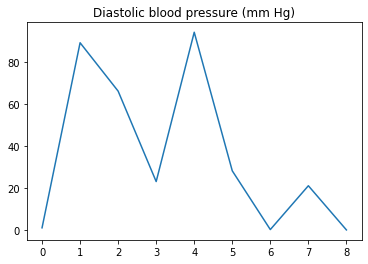

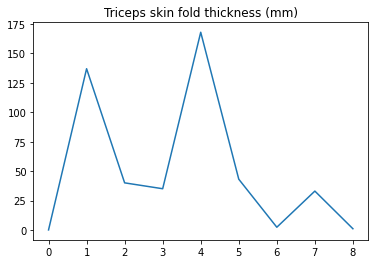

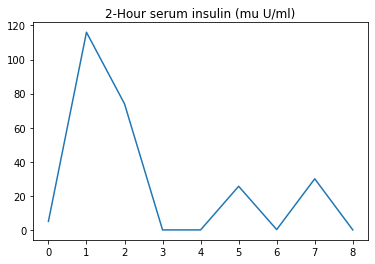

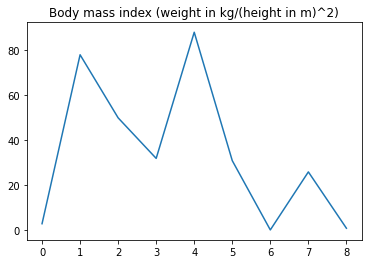

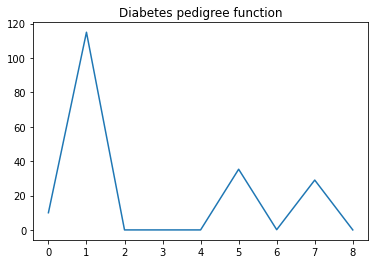

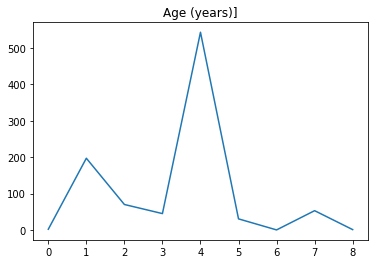

In [48]:
for i, column_name in enumerate(columns_names):
    file_name = re.sub('[^a-zA-Z0-9\s]', '', column_name).strip().replace(' ', '_')
    plt.figure()
    plt.title(column_name)
    plt.plot(np_data[i])
    plt.savefig(str(Path.joinpath(DIR_NAME, f'./images/{file_name}.png')))
    plt.show()
    plt.close()

In [49]:
data.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
feature = data.columns.to_numpy()[:-1]
feature

array(['6', '148', '72', '35', '0', '33.6', '0.627', '50'], dtype=object)

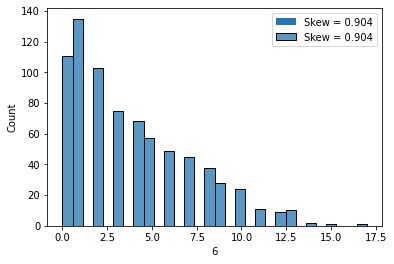

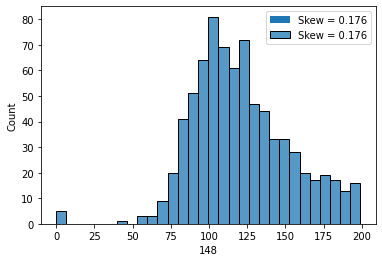

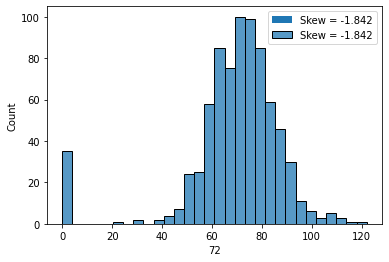

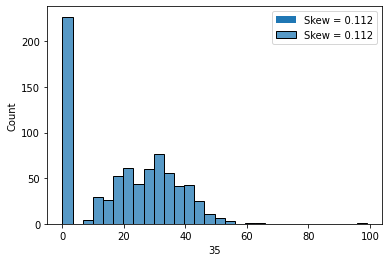

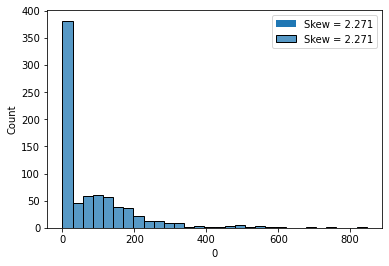

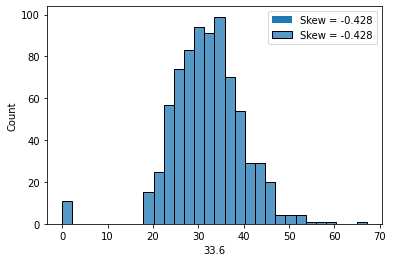

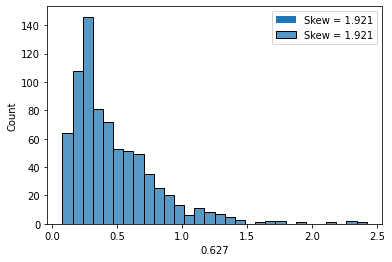

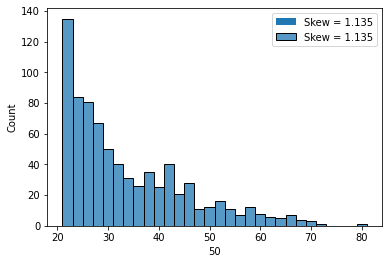

In [61]:
for feat in feature:
    skew = data[feat].skew()
    sns.histplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [52]:
X_train = np_data[:,:-1]
Y_train = np_data[:,-1:]
Y_train = Y_train.reshape(1, -1)[0]

In [53]:
gau = GaussianNB()
gau.fit(X_train, Y_train)

ber = BernoulliNB()
ber.fit(X_train, Y_train)

cmp = ComplementNB()
cmp.fit(X_train, Y_train)

ComplementNB()

In [54]:
y_gau_pred = gau.predict(X_train)

In [55]:
y_gau_pred[0:10]

array([0., 1., 0., 1., 0., 0., 1., 1., 0., 0.])

In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train, y_gau_pred))

0.7627118644067796


In [57]:
Y_train.shape

(767,)

Confusion matrix

 [[422  78]
 [104 163]]

True Positives(TP) =  422

True Negatives(TN) =  163

False Positives(FP) =  78

False Negatives(FN) =  104


<AxesSubplot:>

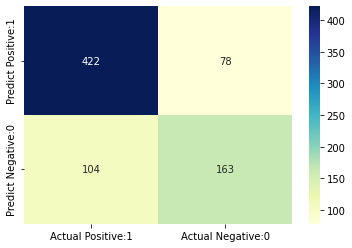

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train, y_gau_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [59]:
clf = ComplementNB()
clf.fit(X_train, Y_train)
clf.predict([X_train[4]])

array([0.])

In [60]:
clf = ComplementNB()
clf.fit(X_train, Y_train)
clf.predict([[8, 125, 96, 0, 0, 0.0, 0.232, 54]])

array([0.])